#YouTube View Count Prediction and Classification along with sentimental analysis.

### Introduction

YouTube has become a highly influential media which is extremely popular among users worldwide. Today, YouTube has millions or even billions of users worldwide. This is one of the most popular social media along with FaceBook, Twitter and others. The popularity of YouTube is closely intertwined with the publishing opportunity offered by the social media because users can publish their videos both documentary and featured ones. In such a way, users get ample opportunities to share their videos instantly. At the same time, the distinct feature of YouTube is its perfomrability because it is the performativity of videos that attracts users and the more performable a video is the more users will watch it, the more popular it becomes.

YouTube only counts views when the following criteria have been met: A user has to **physically click the play button** to begin the video. The video has to be played for at least 30 seconds. 

For such interaction what matters is to attract a user/viewer with the help of:
> Thumbnails

> Video Title

> Video Description and Tags 

We are analysing what titles and description tend to increase user interactivity and increases view count of a video using the concepts of NLP and Deep Learning Models.

Youtubers/Users publishing the video on YouTube may expect the positive feedback from other users. If they receive a negative feedback, they may become interested in creating a new video to match the public interests. In such a way, videos become more and more performable to gain the positive feedback from the part of other users watching them on YouTube. For this task we are also going to perform sentiment analysis and a few other tasks.

###Imports

In [ ]:
!pip install opendatasets
!pip install textstat
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from collections import Counter

import opendatasets as od

from textblob import TextBlob
from textblob import Word

import seaborn as sns
plt.style.use('seaborn-white')

from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as met

import scikitplot as skplt

from wordcloud import WordCloud
import wordcloud

from textwrap import wrap
import textstat

import tensorflow as tf
from keras import regularizers
from keras.utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing import text
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Input, GlobalMaxPooling1D, Conv1D, MaxPooling1D, Embedding

import warnings
warnings.filterwarnings("ignore")

In [ ]:
nltk.download('all')

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

###Load Data

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset?select=IN_youtube_trending_data.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maitrishah01
Your Kaggle Key: ··········


100%|██████████| 1.02G/1.02G [00:54<00:00, 20.3MB/s]


In [ ]:
ogdata = pd.read_csv('/content/youtube-trending-video-dataset/US_youtube_trending_data.csv')
data1 = pd.read_csv('/content/youtube-trending-video-dataset/US_youtube_trending_data.csv')

In [ ]:
data1 = data1.drop(columns = ['channelId','channelTitle', 'thumbnail_link', 'comments_disabled', 'ratings_disabled'])

In [ ]:
data2 = pd.read_csv('USvideos.csv')

data2 = data2.drop(columns = ['channel_title', 'thumbnail_link', 'comments_disabled', 'ratings_disabled','video_error_or_removed'])

data2.rename(columns = {'category_id':'categoryId', 'views':'view_count', 'publish_time': 'publishedAt'}, inplace = True)

In [ ]:
data = pd.concat([data1, data2],ignore_index=True)
data.tail()

,video_id,title,publishedAt,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description
205332,BZt0qjTWNhw,The Cat Who Caught the Laser,2018-05-18T13:00:04.000Z,15,18.14.06,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,The Cat Who Caught the Laser - Aaron's Animals
205333,1h7KV2sjUWY,True Facts : Ant Mutualism,2018-05-18T01:00:06.000Z,22,18.14.06,[none],1064798,60008,382,3936,NaN
205334,D6Oy4LfoqsU,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,2018-05-18T17:34:22.000Z,24,18.14.06,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,I had so much fun transforming Safiyas hair in...
205335,oV0zkMe1K8s,How Black Panther Should Have Ended,2018-05-17T17:00:04.000Z,1,18.14.06,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,How Black Panther Should Have EndedWatch More ...
205336,ooyjaVdt-jA,Official Call of Duty®: Black Ops 4 — Multipla...,2018-05-17T17:09:38.000Z,20,18.14.06,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,Call of Duty: Black Ops 4 Multiplayer raises t...


###Data Cleaning

In [ ]:
data.categoryId.unique()

array([22, 20, 24, 10, 26, 27, 23, 28,  1, 25, 17, 19, 15,  2, 29, 43])

In [ ]:
data = data.drop(columns = ['video_id'])
data

,title,publishedAt,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,"While running her own modding shop, Ramya Pare..."
2,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,I left youtube for a month and this is what ha...
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...
205332,The Cat Who Caught the Laser,2018-05-18T13:00:04.000Z,15,18.14.06,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,The Cat Who Caught the Laser - Aaron's Animals
205333,True Facts : Ant Mutualism,2018-05-18T01:00:06.000Z,22,18.14.06,[none],1064798,60008,382,3936,NaN
205334,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,2018-05-18T17:34:22.000Z,24,18.14.06,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,I had so much fun transforming Safiyas hair in...
205335,How Black Panther Should Have Ended,2018-05-17T17:00:04.000Z,1,18.14.06,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,How Black Panther Should Have EndedWatch More ...


In [ ]:
# Missing Values

num_missing_desc = data.isnull().sum()[-1]    # No. of values with missing descriptions
print('Number of missing values: ' + str(num_missing_desc))
data = data.dropna()

Number of missing values: 4426


In [ ]:
data.isnull().sum()

title            0
publishedAt      0
categoryId       0
trending_date    0
tags             0
view_count       0
likes            0
dislikes         0
comment_count    0
description      0
dtype: int64

In [ ]:
ogdata['publishedAt.date']=pd.to_datetime(ogdata['publishedAt'])
ogdata['publishedAt.month']=ogdata['publishedAt.date'].dt.month
ogdata['publishedAt.day']=ogdata['publishedAt.date'].dt.day

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [ ]:
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

data['title']=data['title'].apply(lambda x:expand_contractions(x))
data['description']=data['description'].apply(lambda x:expand_contractions(x))

In [ ]:
data['title']=data['title'].apply(lambda x: x.lower())
data['description']=data['description'].apply(lambda x: x.lower())

In [ ]:
def preprocess(reviewtext):
    reviewtext = reviewtext.str.replace("(<br/>)","")
    reviewtext = reviewtext.str.replace("\w*\d\w*","") # Digits & Word Containing digits
    reviewtext = reviewtext.str.replace("[%s]"%re.escape(string.punctuation),"") #Punctuations
    #reviewtext = reviewtext.str.replace(" +","") #Extra Spaces
    return reviewtext

data['title'] = preprocess(data['title'])
data['description'] = preprocess(data['description'])
data['tags'] = preprocess(data['tags'])

In [ ]:
#Length
data['title_len'] = data['title'].astype(str).apply(len)
data['description_len'] = data['description'].astype(str).apply(len)

#Word Count
data['title_word_count'] = data['title'].apply(lambda x: len(str(x).split()))
data['description_word_count'] = data['description'].apply(lambda x: len(str(x).split()))
data['tag_word_count'] = data['tags'].apply(lambda x: len(str(x).split()))

In [ ]:
# Word Lemmatization - Title

lem = WordNetLemmatizer()
title_lem = []

for word in data['title']:
  list2 = nltk.word_tokenize(word)
  lemmatized_string = ' '.join([lem.lemmatize(words) for words in list2])
  title_lem.append(lemmatized_string)

data['title_lem'] = title_lem

In [ ]:
# Word Lemmatization - Description

lem = WordNetLemmatizer()
desc_lem = []

for word in data['description']:
  list2 = nltk.word_tokenize(word)
  lemmatized_string = ' '.join([lem.lemmatize(words) for words in list2])
  desc_lem.append(lemmatized_string)

data['description_lem'] = desc_lem

In [ ]:
import json #import data using python json module
with open('/content/youtube-trending-video-dataset/US_category_id.json','r') as f:
    category_data_us= json.loads(f.read())
US_cat = pd.json_normalize(category_data_us,record_path='items')
US_cat['id']= US_cat['id'].astype(int)
data= data.merge(US_cat,how ='left',left_on= 'categoryId',\
                                 right_on='id').rename(columns= {'snippet.title':'category_name'})

In [ ]:
data

,title,publishedAt,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,description,...,description_word_count,tag_word_count,title_lem,description_lem,kind,etag,id,category_name,snippet.assignable,snippet.channelId
0,i asked her to be my girlfriend,2020-08-11T19:20:14Z,22,2020-08-12T00:00:00Z,brawadisprankbasketballskitsghostfunny videosv...,1514614,156908,5855,35313,subscribe to brawadis ▶ httpbitlysubscribetobr...,...,47,10,i asked her to be my girlfriend,subscribe to brawadis ▶ httpbitlysubscribetobr...,youtube#videoCategory,QMEBz6mxVdklVaq8JwesPEw_4nI,22,People & Blogs,True,UCBR8-60-B28hp2BmDPdntcQ
1,apex legends stories from the outlands – “the...,2020-08-11T17:00:10Z,20,2020-08-12T00:00:00Z,Apex LegendsApex Legends charactersnew Apex Le...,2381688,146739,2794,16549,while running her own modding shop ramya parek...,...,97,44,apex legend story from the outlands – “ the en...,while running her own modding shop ramya parek...,youtube#videoCategory,I3IL9xGIM3MsULlqR4tvCsEKv98,20,Gaming,True,UCBR8-60-B28hp2BmDPdntcQ
2,i left youtube for a month and this is what ha...,2020-08-11T16:34:06Z,24,2020-08-12T00:00:00Z,jacksepticeyefunnyfunny memememesjacksepticeye...,2038853,353787,2628,40221,i left youtube for a month and this is what ha...,...,29,26,i left youtube for a month and this is what ha...,i left youtube for a month and this is what ha...,youtube#videoCategory,Qi1csjh-POReitZEbR7CUw7dmao,24,Entertainment,True,UCBR8-60-B28hp2BmDPdntcQ
3,xxl freshman class revealed official announc...,2020-08-11T16:38:55Z,10,2020-08-12T00:00:00Z,xxl freshmanxxl freshmen xxl freshman freshman...,496771,23251,1856,7647,subscribe to xxl → httpbitlysubscribexxl \rxxl...,...,89,20,xxl freshman class revealed official announcement,subscribe to xxl → httpbitlysubscribexxl xxl p...,youtube#videoCategory,HCjFMARbBeWjpm6PDfReCOMOZGA,10,Music,True,UCBR8-60-B28hp2BmDPdntcQ
4,ultimate diy home movie theater for the labran...,2020-08-11T15:10:05Z,26,2020-08-12T00:00:00Z,The LaBrant FamilyDIYInterior DesignMakeoverDe...,1123889,45802,964,2196,transforming the labrant family is empty white...,...,208,31,ultimate diy home movie theater for the labran...,transforming the labrant family is empty white...,youtube#videoCategory,gYzt8dB8mlod-84ipMtjynYe9xU,26,Howto & Style,True,UCBR8-60-B28hp2BmDPdntcQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200906,bts plays with puppies while answering fan que...,2018-05-18T16:39:29.000Z,22,18.14.06,BuzzFeedBuzzFeedVideoPuppy Interviewpuppyjohn ...,8259128,645888,4052,62610,bts with the pps the puppies these adorable pu...,...,61,11,bts play with puppy while answering fan question,bts with the pps the puppy these adorable pupp...,youtube#videoCategory,QMEBz6mxVdklVaq8JwesPEw_4nI,22,People & Blogs,True,UCBR8-60-B28hp2BmDPdntcQ
200907,the cat who caught the laser,2018-05-18T13:00:04.000Z,15,18.14.06,aarons animalsaaronsanimalscatcatskittenkitten...,1685609,38160,1385,2657,the cat who caught the laser aaron is animals,...,9,3,the cat who caught the laser,the cat who caught the laser aaron is animal,youtube#videoCategory,ra8H7xyAfmE2FewsDabE3TUSq10,15,Pets & Animals,True,UCBR8-60-B28hp2BmDPdntcQ
200908,i gave safiya nygaard a perfect hair makeover ...,2018-05-18T17:34:22.000Z,24,18.14.06,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,i had so much fun transforming safiyas hair in...,...,67,51,i gave safiya nygaard a perfect hair makeover ...,i had so much fun transforming safiyas hair in...,youtube#videoCategory,Qi1csjh-POReitZEbR7CUw7dmao,24,Entertainment,True,UCBR8-60-B28hp2BmDPdntcQ
200909,how black panther should have ended,2018-05-17T17:00:04.000Z,1,18.14.06,Black PantherHISHEMarvelInfinity WarHow It Sho...,5660813,192957,2846,13088,how black panther should have endedwatch more ...,...,230,15,how black panther should have ended,how black panther should have endedwatch more ...,youtube#videoCategory,IfWa37JGcqZs-jZeAyFGkbeh6bc,1,Film & A

###Exploratory Data Analysis

#### Basic Data Exploration

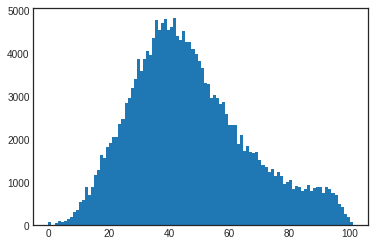

In [ ]:
#Title Length Histogram
plt.hist(data['title_len'],bins=100)
plt.show()

Optimal tiltle  length for trending vidoes seems to be around 40 characters long

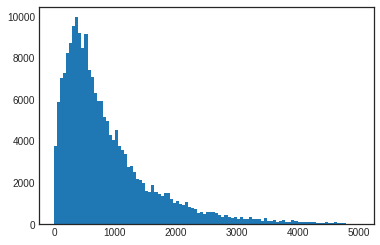

In [ ]:
#Description Length Histogram
plt.hist(data['description_len'],bins=100)
plt.show()

The graph for description length is slightly skewed as we can see that descriiptions that have around 0-1000 characters length are much more favored compared to the rest of the spread

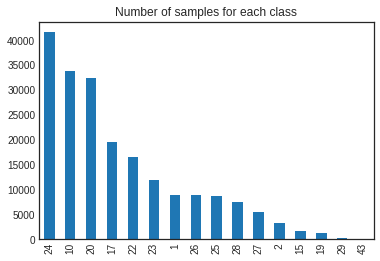

In [ ]:
data['categoryId'].value_counts().sort_values(ascending=False).plot(kind='bar', y='Number of Samples', 
                                                                title='Number of samples for each class')

Here we get a general Idea that categorys 10,20,24 are more likely to be top trending on the other side categoreys 19,29,43 have lower score.

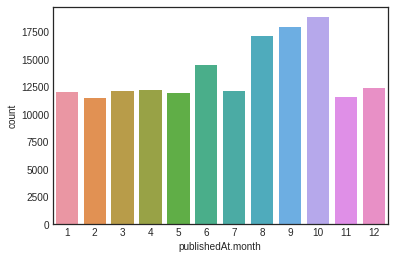

In [ ]:
#Monthwise Published videos
sns.countplot(ogdata['publishedAt.month'])
plt.show()

Here we are trying to observe that does releasing a video in a paticular month affect its chances in geting into trending. While the difference may not be that great we can clearly see that moths August, September, October have higher amounts of videos going to trending or in other words the trending charts being much more volatile

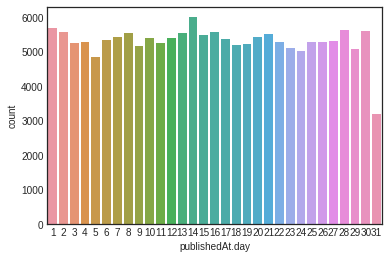

In [ ]:
#Daywise Published Videos

sns.countplot(ogdata['publishedAt.day'])
plt.show()

Just like the monts we try and analyise if there is direct relation between the date and trending but as evident it is clearly not the case. Even though one may think that releasing a video on 31 is foolish due to its low rate the fact remains that 31 also comes only half the time and hence this value can be explained

#### Advanced Exploration

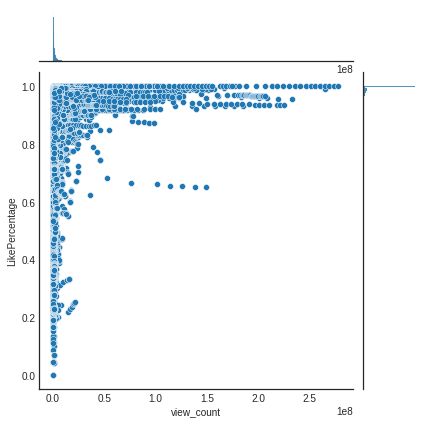

In [ ]:
data['LikePercentage'] = data['likes'] / (data['dislikes'] + data['likes'])
sns.jointplot(data['view_count'], data['LikePercentage'])

This plot basicaly shows us if the increase in view is corelated to like percentage. In other words what sentiments a video holds in some sence. As we can say that the like and dislike is a direct representation of ones choice

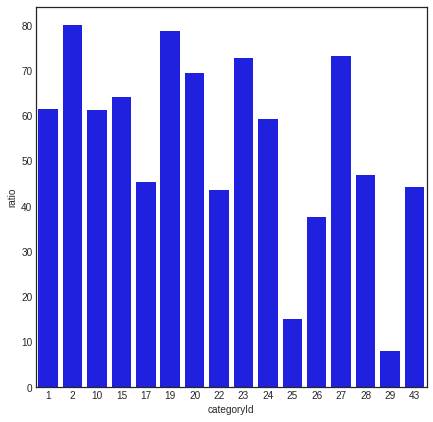

In [ ]:
like_dislike_ratio = data.groupby('categoryId')['likes'].agg('sum') / data.groupby('categoryId')['dislikes'].agg('sum')
like_dislike_ratio = like_dislike_ratio.sort_values(ascending=False).reset_index()
like_dislike_ratio.columns = ['categoryId','ratio']
plt.subplots(figsize=(7,7))
sns.barplot(y="ratio", x="categoryId", data=like_dislike_ratio,
            label="Likes-Dislikes Ratio", color="b")

This shows if any category in general is hated and as we can see that 25,29 have a very bad ratio. Now if we look at the previous chart which shows the trending appearence with respect to category we see that 25,29 have a very low appearence.

In [ ]:
def visualize_most(my_df, column, num=10): # getting the top 7 videos by default
    sorted_df = my_df.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df[column].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

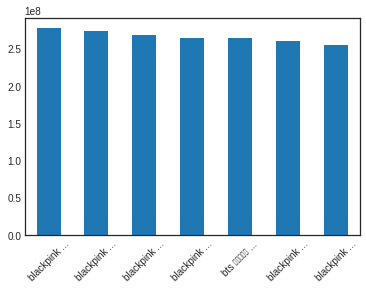

In [ ]:
visualize_most(data, 'view_count', num=7)

Just the top 7 data points in terms of view count

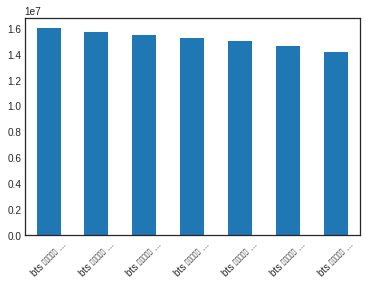

In [ ]:
visualize_most(data, 'likes', num=7)

Just the top 7 data points in terms of likes

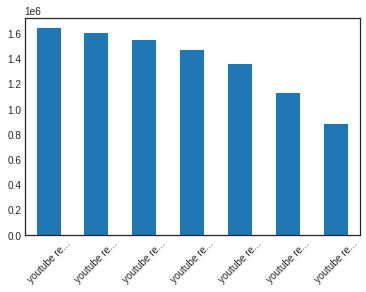

In [ ]:
visualize_most(data, 'dislikes', num=7)

Just the top 7 data points in terms of dislikes

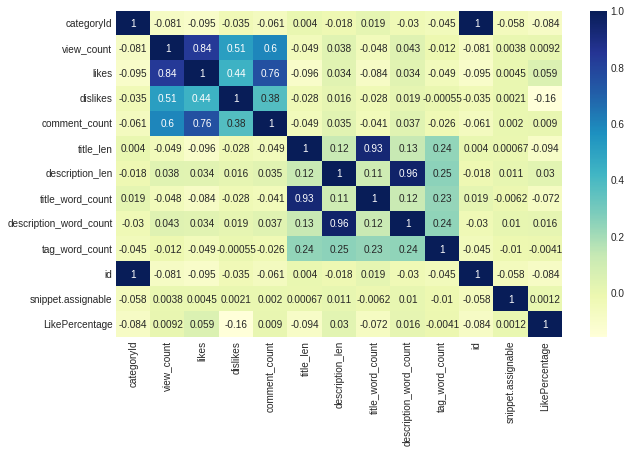

In [ ]:
figure = plt.subplots(figsize=(10,6))
corr_map = sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

This chart shows the correlation between different columns of data that are available we can see that the view count and likes have a high correlation also the more the people like the video the more likely they are to comment

In [ ]:
def get_top_ngrams(df,n=None,stop_word_remove=True,range=(1,1)):
    if (stop_word_remove):
        vec = CountVectorizer(stop_words='english',ngram_range=range).fit(df)
    else:
        vec = CountVectorizer(ngram_range=range).fit(df)
    bag_of_words = vec.transform(df)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word,sum_words[0,i]) for word,i in vec.vocabulary_.items()]
    #words_freq = list(cv_fit.vocabulary_.items())
    words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
    
    return words_freq[:n]

In [ ]:
def show_data(common_words):
    df_ngram = pd.DataFrame(common_words,columns=['word','count'])
    df_ngram = df_ngram.groupby('word').sum()['count'].sort_values(ascending=False).reset_index()

    fig,ax = plt.subplots(figsize=(14,6))
    fig = sns.barplot(x = 'word',y='count',data=df_ngram,ci = None, ax=ax)

    ax.set_xticklabels(labels=df_ngram['word'], rotation=45, ha='right')
    plt.show()


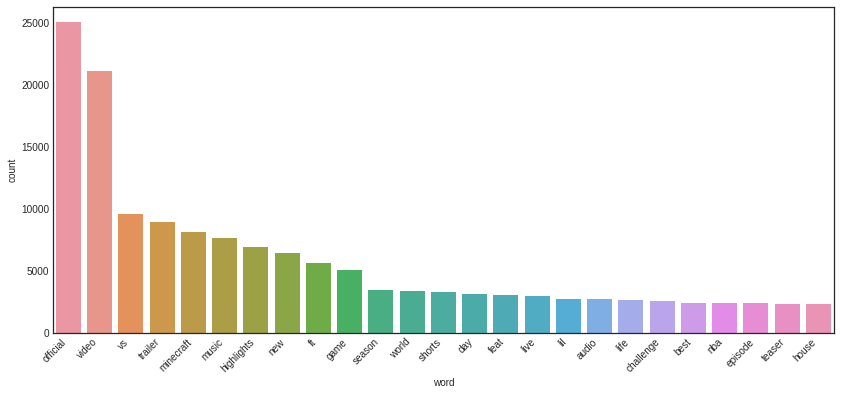

In [ ]:
common_word = get_top_ngrams(data['title'],25)
show_data(common_word)


This is an analysis on the baises of ouccourence of a keyword in the top trending videos. We can see that words like official, video, vs have a very high rate of appearence. To gain further insight we will use bigram

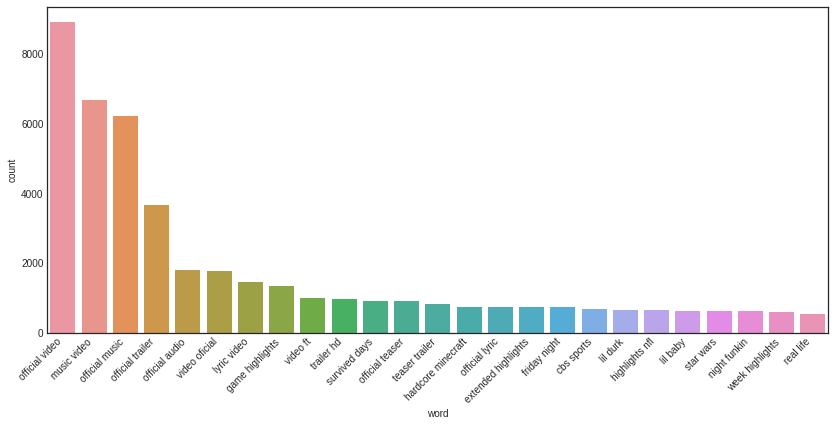

In [ ]:
common_words = get_top_ngrams(data['title'],25,True,range=(2,2))
show_data(common_words)

On using bigram it gets more clear that vords ouccoureces like official video, music video, and so on hold very high number in the trending. Now this could mean a few things either they pay youtube to keep their songs trending or that the value of the video is not in the video itself but the artist because just by adding official video your video would not go hit.



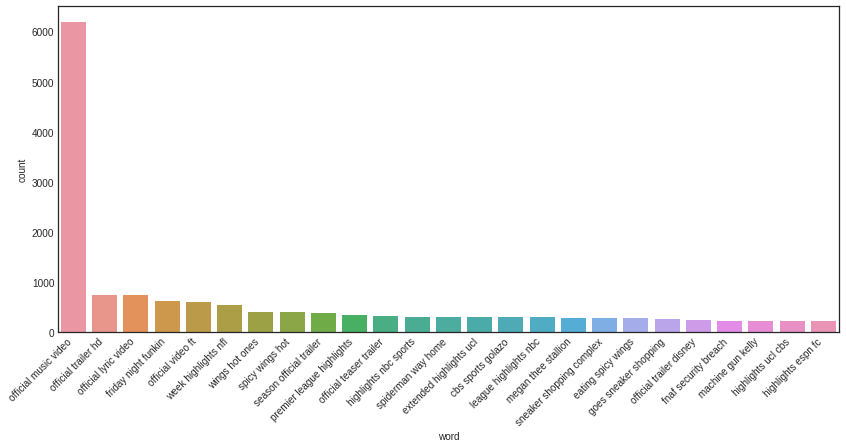

In [ ]:
common_words = get_top_ngrams(data['title'],25,True,range=(3,3))
show_data(common_words)

Cheking the trigram we see that the above trend becomes even more prominant for the higher side where we see a very heavy skew. While here other kinds of formats also show.

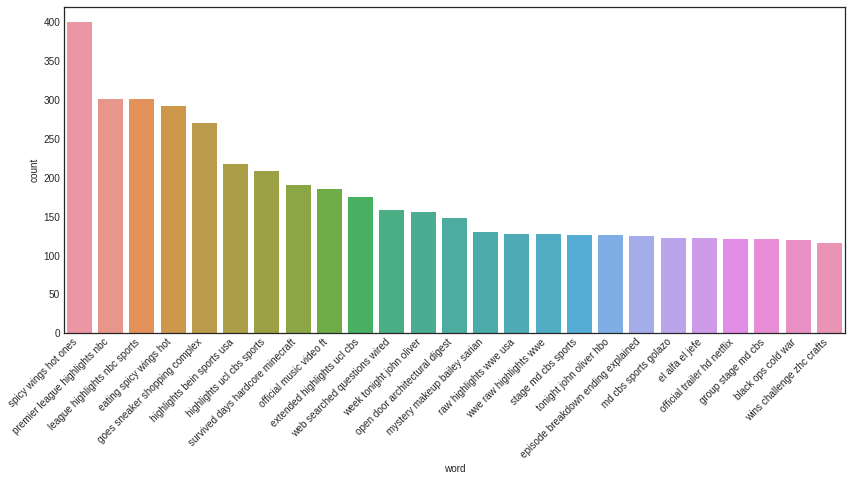

In [ ]:
common_words = get_top_ngrams(data['title'],25,True,range=(4,4))
show_data(common_words)

Taking a bag of 4 we see the attention shift from music videos to sports mostly because those are the videos that will have those consistant long titles with only the date/team names changed

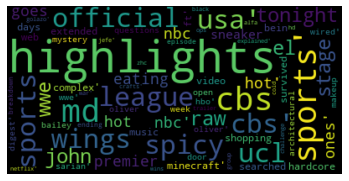

In [ ]:
wordcloudd = wordcloud.WordCloud().generate(str(common_words))
plt.imshow(wordcloudd, interpolation='bilinear')
plt.axis("off")
plt.show()

Here is a textual repersentation of the corpus

###LSTM - Predicition of View Count

We used GloVe embeddings to convert each title into a sequence of vectors, then zero-padded each sequence to become the same length.

First we tried a network which is a fairly standard network used in NLP tasks: 

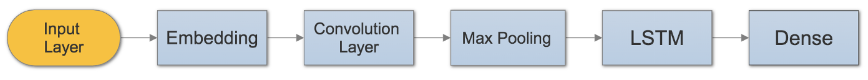

We noticed that the network trained quickly, but although the training loss was decreasing rapidly, the validation loss actually began to increase. This was a sign that the model was probably overfitting. Keeping this in mind we did changes to the network:

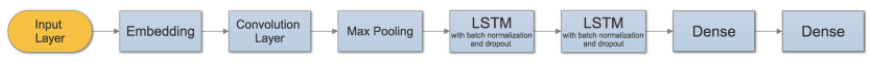

The difference was that in this new network, we added in more LSTM units per layer as well as another LSTM layer. We subjected each to more normalization so that we could avoid overfitting. We could train this for around 15 epochs and noticed that the training loss would decrease slightly, but also that the validation loss fluctuated a lot. Ultimately, there seemed to be more noise than signal just using the titles and description of the videos. Each epoch took a long time to train, especially with this many LSTM units. Due to lack of computational resources, we were not able to optimize this network. For this limited resources we got training accuracy of around 19% with 18.5% as validation accuracy.

In [ ]:
MAX_SEQUENCE_LENGTH = 1000
#MAX_NB_WORDS = 20000
MAX_NB_WORDS = 2000
VALIDATION_SPLIT = 0.2
EMBEDDING_DIM = 100
NUM_BINS = 6 
np.random.seed(0)

In [ ]:
#GloVe Embedding

embeddings_index = {}
f = open('/content/glove.6B.100d.txt'.format(EMBEDDING_DIM), encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print ('Found %s word vectors.' % len(embeddings_index))

#df = pd.read_csv('../../data/data.csv', encoding='latin1')

data['Percentile_Bin'] = pd.qcut(data['view_count'], NUM_BINS, labels=range(NUM_BINS))
data = data.dropna()

Found 400000 word vectors.


We compute an index mapping words to known embeddings, by parsing the data dump of pre-trained embeddings:

In [ ]:
data['All'] = data.description_lem + ' ' + str(data.likes) + ' ' + data.title_lem

In [ ]:
X = data['All']
y = data['Percentile_Bin']

texts = set()
for x in X:
    texts.add(x)

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

dataa = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(y))
print('Shape of data tensor:', dataa.shape)
print('Shape of label tensor:', labels.shape)

Found 310087 unique tokens.
Shape of data tensor: (39128, 1000)
Shape of label tensor: (199776, 6)


In [ ]:
# split the data into a training set and a validation set

indices = np.arange(dataa.shape[0])
np.random.shuffle(indices)
dataa = dataa[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * dataa.shape[0])

x_train = dataa[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = dataa[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

At this point we can leverage our embedding_index dictionary and our word_index to compute our embedding matrix and we load this embedding matrix into an Embedding layer. Note that we set trainable=False to prevent the weights from being updated during training.

In [ ]:
# prepare embedding matrix

num_words = min(MAX_NB_WORDS, len(word_index.items()))
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NB_WORDS or i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
# create the model
batch_size = 32
model1 = Sequential()
model1.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=x_train.shape[1]))
model1.add(Conv1D(filters=96, kernel_size=3, padding='same', activation='relu'))
#model1.add(MaxPooling1D(pool_size=2))
model1.add(LSTM(100,  kernel_regularizer = regularizers.l2(0.01)))
# model1.add(LSTM(200))
model1.add(Dense(100, activation = 'relu'))
model1.add(Dense(6, activation='softmax'))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.01)

model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         200000    
                                                                 
 conv1d (Conv1D)             (None, 1000, 96)          28896     
                                                                 
 lstm (LSTM)                 (None, 100)               78800     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 318,402
Trainable params: 318,402
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Early Stopping

callback = tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    min_delta=0,
    patience=7,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [ ]:
history = model1.fit(x_train, y_train, epochs=15, validation_data=(x_val, y_val), batch_size=64, callbacks=[callback])

Epoch 1/15
490/490 [==============================] - 42s 65ms/step - loss: 1.8052 - accuracy: 0.1877 - val_loss: 1.8018 - val_accuracy: 0.1918
Epoch 2/15
490/490 [==============================] - 40s 82ms/step - loss: 1.7877 - accuracy: 0.1889 - val_loss: 1.7819 - val_accuracy: 0.1922
Epoch 3/15
490/490 [==============================] - 43s 89ms/step - loss: 1.7820 - accuracy: 0.1891 - val_loss: 1.7817 - val_accuracy: 0.1922
Epoch 4/15
490/490 [==============================] - 44s 89ms/step - loss: 1.7822 - accuracy: 0.1874 - val_loss: 1.7818 - val_accuracy: 0.1922
Epoch 5/15
490/490 [==============================] - 37s 76ms/step - loss: 1.7822 - accuracy: 0.1878 - val_loss: 1.7817 - val_accuracy: 0.1922
Epoch 6/15
490/490 [==============================] - 36s 74ms/step - loss: 1.7821 - accuracy: 0.1907 - val_loss: 1.7818 - val_accuracy: 0.1922
Epoch 7/15
490/490 [==============================] - 31s 64ms/step - loss: 1.7820 - accuracy: 0.1877 - val_loss: 1.7817 - val_accuracy:

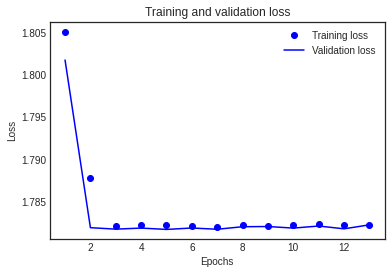

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b' , label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

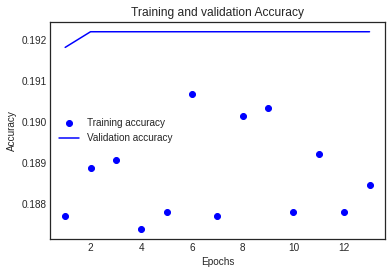

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b' , label = 'Validation accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# Final evaluation of the model
scores = model1.evaluate(x_val, y_val)
print("Accuracy: %.3f%%" % (scores[1]*100))

245/245 [==============================] - 5s 19ms/step - loss: 1.7818 - accuracy: 0.1922
Accuracy: 19.220%


###Random Forest Regressor - Predicition of View Count 

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. 
Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [ ]:
x = data[['categoryId','tag_word_count','description_word_count','title_word_count']] 
y = data['view_count']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.2f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=104)
best_model1 = rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
eval_regression(rf, pred, xtrain, ytrain, xtest, ytest)

MAE: 819261.25
RMSE: 2969310.17
R2 score: 0.80


After implementing this we get R-squared value as 85% that is randoom forest regressor precisely predicts the view counts. We see that their is hight Root mean square error. This arises due to not predicting the exact value of view count for individual videos and rather a very nearby value.




Text(0.5, 1.0, 'Feature importance score')

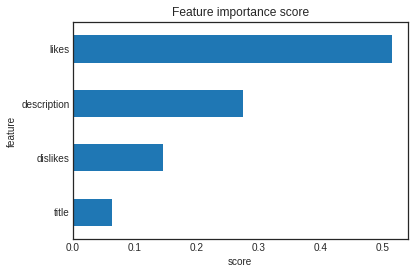

In [ ]:
#make feature importance graph
X = data[['title', 'description', 'likes', 'dislikes']] 
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('Feature importance score')

From the Feature Importance score we see that likes and description of the video are important features to be considered while prediction. We have considered those for our LSTM network also.

###Decision Tree Regressor - Prediction of View Count

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output. Continuous output means that the output/result is not discrete, i.e., it is not represented just by a discrete, known set of numbers or values.

In [ ]:
x = data[['categoryId','tag_word_count','description_word_count','title_word_count']] 
y = data['view_count']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
pred = dt.predict(xtest)
eval_regression(dt, pred, xtrain, ytrain, xtest, ytest)

MAE: 787302.32
RMSE: 2989227.09
R2 score: 0.80


After implementing this we get R-squared value as 80% that is decision tree regressor precisely predicts the view counts. We see that their is hight Root mean square error. This arises due to not predicting the exact value of view count for individual videos and rather a very nearby value.




###Random Forest Classifier - Classification of Youtube videos based on top 7 categories

In [ ]:
data['All_text'] = data.description_lem + ' ' + data.tags + ' ' + data.title_lem

In [ ]:
data.category_name.value_counts()

Entertainment            41446
Music                    33567
Gaming                   32207
Sports                   19445
People & Blogs           16337
Comedy                   11781
Howto & Style             8720
Film & Animation          8687
News & Politics           8591
Science & Technology      7311
Education                 5396
Autos & Vehicles          3238
Pets & Animals            1623
Travel & Events           1207
Nonprofits & Activism      163
Shows                       57
Name: category_name, dtype: int64

In [ ]:
#Top 7 categories

data_filtered = data[data.category_name.isin(['Entertainment', 'Sports', 'Music', 'Gaming', 'People & Blogs', 'Comedy','News & Politics'])]

In [ ]:
X = data_filtered.All_text
Y = data_filtered.category_name
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [ ]:
# Applying bag of words to features in training and testing data
bag_of_words_creator = CountVectorizer()
X_train_bow = bag_of_words_creator.fit_transform(X_train)
X_test_bow = bag_of_words_creator.transform(X_test)

In [ ]:
cl = RandomForestClassifier(random_state = 0, n_estimators=20)
cl.fit(X_train_bow,Y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [ ]:
y_pred = cl.predict(X_test_bow)

In [ ]:
confusion_matrix(Y_test,y_pred)

array([[ 3549,     9,     1,     3,     0,     0,     0],
       [    1, 12430,     6,    12,     5,     3,     2],
       [    0,    10,  9605,     5,     0,     6,     0],
       [    0,    11,     0,  9990,     0,     1,     0],
       [    0,     7,     1,     1,  2629,     0,     0],
       [    0,    38,     0,     2,     1,  4922,     0],
       [    0,    16,     2,     0,     0,     0,  5745]])

In [ ]:
print("Accuracy Score: ", accuracy_score(Y_test, y_pred))

Accuracy Score:  0.9970824067084243


In [ ]:
print(met.classification_report(Y_test,y_pred))

                 precision    recall  f1-score   support

         Comedy       1.00      1.00      1.00      3562
  Entertainment       0.99      1.00      1.00     12459
         Gaming       1.00      1.00      1.00      9626
          Music       1.00      1.00      1.00     10002
News & Politics       1.00      1.00      1.00      2638
 People & Blogs       1.00      0.99      0.99      4963
         Sports       1.00      1.00      1.00      5763

       accuracy                           1.00     49013
      macro avg       1.00      1.00      1.00     49013
   weighted avg       1.00      1.00      1.00     49013



With Bag Of Words vectorizer we get 99.7% accuracy for category classification using Youtube video title, description as well as tags.

In [ ]:
#TFIDF

tfidf_creator = TfidfVectorizer()
X_train_tfidf = tfidf_creator.fit_transform(X_train)
X_test_tfidf = tfidf_creator.transform(X_test)

#cl = RandomForestClassifier(random_state = 0, n_estimators=1000)
cl = RandomForestClassifier(random_state = 0, n_estimators=20)
cl.fit(X_train_tfidf,Y_train)

y_pred = cl.predict(X_test_tfidf)

confusion_matrix(Y_test,y_pred)

array([[ 3550,     6,     2,     4,     0,     0,     0],
       [    2, 12424,     8,    14,     6,     3,     2],
       [    0,    25,  9592,     1,     0,     5,     3],
       [    0,     8,     1,  9993,     0,     0,     0],
       [    0,    12,     2,     0,  2624,     0,     0],
       [    2,    30,     0,     5,     5,  4921,     0],
       [    0,    12,     2,     0,     0,     0,  5749]])

In [ ]:
print("Accuracy Score: ", accuracy_score(Y_test, y_pred))

Accuracy Score:  0.9967355599534817


With TFIDF vectorizer we get 99.67% accuracy for category classification using Youtube video title, description as well as tags.

From this ML Model, We can find out the missing category of any video, based on the information obtained from title, tag and description

A platform like youtube can use this model to recommend the category to the users by doing real time analysis on title, tag and description while they are uploading their videos

###Sentiment Analysis

Sentiment Analysis is one of the Natural Language Processing techniques, which can be used to determine the sensibility behind the texts, i.e. tweets, movie reviews, youtube video descriptions, any incoming message, etc. 

For Desccriptions

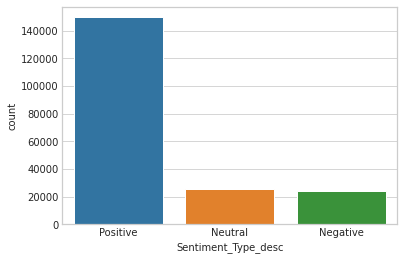

In [ ]:
bloblist_title = list()

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

data['TextBlob_Polarity_desc'] = data['description_lem'].apply(getPolarity)

def f(data):
    if data['TextBlob_Polarity_desc'] > 0:
        val = "Positive"
    elif data['TextBlob_Polarity_desc'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

data['Sentiment_Type_desc'] =data.apply(f, axis=1)

plt.figure()
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type_desc", data=data)

After performing sentimental analysis on youtube video description we find that that most of the video that reached the trending list had postive video descriptions. The count for Positive descriptions were around 140000 while for negative and neutral, they reached 20000 individually. 

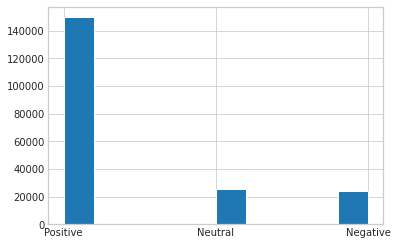

In [ ]:
#Polarity Plot - Description - Histogram

data["Sentiment_Type_desc"].hist()

For titles

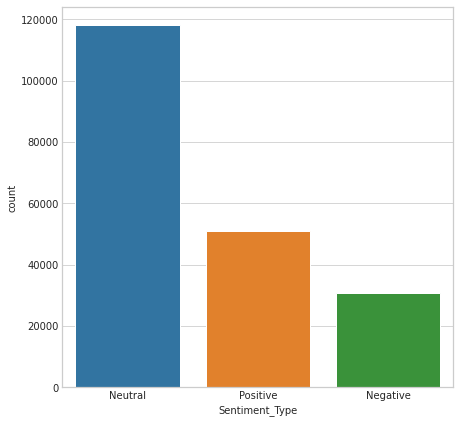

In [ ]:
bloblist_title = list()

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

data['TextBlob_Polarity'] = data['title_lem'].apply(getPolarity)

def f(data):
    if data['TextBlob_Polarity'] > 0:
        val = "Positive"
    elif data['TextBlob_Polarity'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

data['Sentiment_Type'] =data.apply(f, axis=1)

plt.figure(figsize=(7,7))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=data)

we can very clearly see that the top trending videos have a slightly positive polarity with the majority being neutral.

After performing sentimental analysis on youtube video title we find that that most of the video that reached the trending list had neutral video titles. The count for Neutral titles were around 120000 while for positive, they reached 50000 and negative was around 30000. 

##Transformers - Sentiment Analysis using HuggingFace

In [ ]:
!pip install transformers --quiet
!pip install torch==1.9.0 --quiet
!pip install textattack --quiet
!pip install urllib3==1.25.4 --quiet
!pip install folium==0.2.1 --quiet
!pip install datasets --quiet
!pip install pytorch_pretrained_bert --quiet
!pip install tensorflow-text

!pip install git+https://github.com/NeuromatchAcademy/evaltools --quiet
from evaltools.airtable import AirtableForm

# generate airtable form
atform = AirtableForm('appn7VdPRseSoMXEG','W2D4_T1','https://portal.neuromatchacademy.org/api/redirect/to/720613bf-c3cd-4fae-9286-b1c3cced6728')


In [ ]:
# Imports
import tqdm
import math
import torch
import statistics
import random

import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

from torch import nn
from pprint import pprint
from tqdm.notebook import tqdm
from datasets import load_metric
from datasets import load_dataset

# transformers library
from transformers import Trainer
from transformers import pipeline
from transformers import set_seed
from transformers import AutoTokenizer
from transformers import TrainingArguments
from transformers import AutoModelForCausalLM
from transformers import AutoModelForSequenceClassification


%load_ext tensorboard

Here we ask the pre-trained language model "gpt2" to calculate the likelihood of already existing text-extensions. We define a positive text-extension as well as a negative text-extension. The sentiment of the given text context can then be determined by comparing the likelihoods of the given text extensions.

(For a positive review, a positive text-extension should ideally be given more likelihood by the pre-trained langauge model as compared to a negative text-extension. Similarly, for a negative review, the negative text-extension should have more likelihood than the positive text-extension.)

In [ ]:
context = data['title']

In [ ]:
model_name = "gpt2" #param ["gpt2", "gpt2-medium", "xlnet-base-cased"]
model = AutoModelForCausalLM.from_pretrained(model_name)
model.eval()
tokenizer = AutoTokenizer.from_pretrained(model_name)

custom_positive_extension = "I would definitely recommend this!" #param {type:"string"}
custom_negative_extension = "I would not recommend this!" #param {type:"string"}

texts = [context[3], custom_positive_extension, custom_negative_extension]
encodings = tokenizer(texts)

positive_input_ids = torch.tensor(encodings["input_ids"][0] + encodings["input_ids"][1])
positive_attention_mask = torch.tensor(encodings["attention_mask"][0] + encodings["attention_mask"][1])
positive_label_ids = torch.tensor([-100]*len(encodings["input_ids"][0]) + encodings["input_ids"][1])

outputs = model(input_ids=positive_input_ids,
                attention_mask=positive_attention_mask,
                labels=positive_label_ids)
positive_extension_likelihood = -1*outputs.loss
print("\nLog-likelihood of positive extension = ", positive_extension_likelihood.item())

negative_input_ids = torch.tensor(encodings["input_ids"][0] + encodings["input_ids"][2])
negative_attention_mask = torch.tensor(encodings["attention_mask"][0] + encodings["attention_mask"][2])
negative_label_ids = torch.tensor([-100]*len(encodings["input_ids"][0]) + encodings["input_ids"][2])
outputs = model(input_ids=negative_input_ids,
                attention_mask=negative_attention_mask,
                labels=negative_label_ids)
negative_extension_likelihood = -1*outputs.loss
print("\nLog-likelihood of negative extension = ", negative_extension_likelihood.item())

if (positive_extension_likelihood.item() > negative_extension_likelihood.item()):
    print("\nPositive text-extension has greater likelihood probabilities!")
    print("The given review can be predicted to be POSITIVE ")
else:
    print("\nNegative text-extension has greater likelihood probabilities!")
    print("The given review can be predicted to be NEGATIVE ")



Log-likelihood of positive extension =  -5.478392124176025

Log-likelihood of negative extension =  -5.6785888671875

Positive text-extension has greater likelihood probabilities!
The given review can be predicted to be POSITIVE 👍


#Conclusion
Hence, we have performed YouTube View Count prediction and classification along with sentimental analysis for the same. Given below are conclusions made after performing the project. 

1. Removal of punctuations, special characters and digits is neccesary as to the NLP model while training they do not provide any special knowledge. 

2. The data observed for length of desciption is skewed showing that usual length of a description is 0 to 1000 characters. 

3. Release of videos between august to october is optimal for high view count. In general video channels like Blackpink and BTS recieves highest view counts for most of the videos.

4. Under Correlation Analysis (likes, comment_count), (likes, view_count) were highly correlated and (comment_count, view_count), (likes, dislikes) were fairly correlated. (Other pairs including title lengths showed correlation but should not be mentioned as those were obvious to appear and not obtained conclusions)

5. One important analysis made, through ngrams, was that combination of words like "official", "video", "official video", "music video", "official music", "official music video", "spicy wings hot ones" fetched the highest view count and should be used in titles if ones wants to grab viewer attention.

6. LSTM provides a 19.220% accuracy. In accordance to the reasons mentioned in the LSTM section above, due to lack of computational resources, we were not able to optimize this network.

7. Random forest and decision trees give good results in view prediction. 

8. We make use of the ensemble learning feature of random forests to understand that likes and description of the video end up being important features to be considered while prediction. We have considered those for our LSTM network also.

9.  While testing Decision Trees we get: "R-squared value as 80%". Hight Root mean square error which arises due to not predicting the exact value of view count for individual videos and rather a very nearby value. 

10. In Random Forest Classifier with Bag Of Words vectorizer we get 99.7% accuracy for category classification using the top 7 categories. Same with TFIDF vectorizer we get 99.67% accuracy.

11. As mentioned above in the Random Forest Classifier section, "A platform like youtube can use this model to recommend the category to the users by doing real time analysis on title, tag and description while they are uploading their videos".

12. In sentimental analysis, most of the video that reached the trending list had positive video descriptions with majority of video having neutral titles.

13. Implementing Tranformers, we ask the pre-trained language model "gpt2" to calculate the likelihood of already existing text-extensions. We define a positive text-extension as well as a negative text-extension. The sentiment of the given text context is then determined by comparing the likelihoods of the given text extensions.

In [ ]:
! jupyter nbconvert --to html /content/I036,I039,I040,I057_NLP_Report.ipynb

[NbConvertApp] Converting notebook /content/I036,I039,I040,I057_NLP_Report.ipynb to html
[NbConvertApp] Writing 1300800 bytes to /content/I036,I039,I040,I057_NLP_Report.html
